# Problem 2 Realisation

In [1]:
# Run this cell to import modules
import numpy as np
import importlib
import matplotlib.pyplot as plt

import setup
import selection as slc
import crossover as co
import mutation as mu
import nextgeneration as ng

## Genetic Algorithm Realisation

### Sumplete Initialisation (k = 3)
randomly generate an original matrix to simulate a Sumplete game board of size $k$ ($k \geq 3$). Initialise the values of the target row and column sums for the Sumplete game (In my test I took the sum of the original matrix without deletions to be the target sums).

In [3]:
# Matrix size: 3
k = 3

# Generate the original matrix
original_matrix = setup.original_matrix_generator(k)

# Generate random target sums
target_row_sums, target_col_sums = setup.generate_target_sums(original_matrix, deletion_rate=1/3)

### Population Initialisation

randomly generate an initial population of possible solutions based on the population size and deletion rate, ensuring that 1/3 of the entries are zeros (according to the suggested deletion rate).

In [4]:
# Initialise the GA population
population = setup.initialise_population(pop_size=100, matrix_size=k, deletion_rate=1/3)

# Print out the original matrix and target sums for reference
print("Original Matrix:\n", original_matrix)
print("Target Row Sums:", target_row_sums)
print("Target Column Sums:", target_col_sums)
print("Sample Individual from Initial Population:\n", population[0])

# Run the fitness function on the first individual as a test (should be 0)
test_fitness = setup.fitness_function(population[0], original_matrix, target_row_sums, target_col_sums)
print("Fitness of the Sample Individual:", test_fitness)

Original Matrix:
 [[6 1 4]
 [4 8 4]
 [6 3 5]]
Target Row Sums: [10  8 14]
Target Column Sums: [12 11  9]
Sample Individual from Initial Population:
 [[1 1 0]
 [0 1 0]
 [1 1 1]]
Fitness of the Sample Individual: 0


### Selection (Tournament size: 5)
Utilise tournament selection as the method for choosing individuals for reproduction (see selection.py).

### Crossover
Apply 1-point crossover operation to produce offspring from the selected individuals (see crossover.py).

### Mutation (Mutation rate: 0.01)
Introduce mutations with a small probability to maintain genetic diversity (see mutation.py).

### Replacement and Termination (Number of generation: 100)
Implement a replacement strategy to form a new population, and define a maximum number of generations and a satisfactory fitness level to terminate the GA (see nextgeneration.py).

In [5]:
importlib.reload(ng)

print(ng.next_generation(num_generations=100, population=population, original_matrix=original_matrix, target_row_sums=target_row_sums, target_col_sums=target_col_sums, tournament_size=5, mutation_rate=0.01))

Solution found at generation 0
([array([[0, 1, 1],
       [1, 1, 0],
       [1, 0, 1]]), array([[0, 1, 1],
       [1, 0, 1],
       [0, 1, 1]]), array([[1, 1, 0],
       [0, 1, 0],
       [1, 1, 1]]), array([[1, 0, 0],
       [1, 1, 1],
       [1, 1, 1]]), array([[0, 1, 1],
       [1, 1, 1],
       [0, 1, 0]]), array([[0, 1, 1],
       [1, 1, 0],
       [1, 0, 1]]), array([[0, 1, 1],
       [0, 1, 1],
       [0, 1, 1]]), array([[1, 0, 1],
       [0, 0, 1],
       [1, 0, 1]]), array([[1, 1, 1],
       [1, 1, 0],
       [0, 1, 0]]), array([[1, 1, 1],
       [0, 1, 0],
       [1, 1, 0]]), array([[0, 1, 0],
       [1, 1, 1],
       [1, 0, 1]]), array([[0, 0, 1],
       [1, 0, 1],
       [1, 1, 1]]), array([[1, 0, 0],
       [0, 1, 1],
       [1, 0, 1]]), array([[0, 0, 1],
       [1, 1, 1],
       [1, 1, 1]]), array([[0, 0, 1],
       [0, 1, 1],
       [1, 1, 1]]), array([[0, 0, 1],
       [1, 1, 1],
       [1, 1, 0]]), array([[1, 0, 1],
       [1, 0, 0],
       [1, 1, 1]]), array([[1, 1, 1

## Performance Analysis

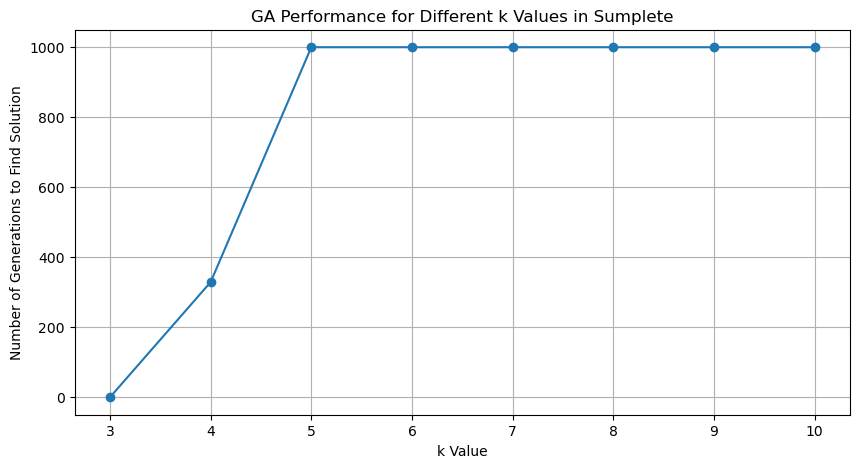

In [10]:
def run_ga_for_sumplete(k, num_generations, tournament_size, mutation_rate):
    '''
    This function runs the genetic algorithm for the Sumplete game for a given size k
    and returns the number of generations it took to find a solution and a flag indicating success.
    '''
    # Generate a new Sumplete game board
    original_matrix = setup.original_matrix_generator(k)
    target_row_sums, target_col_sums = setup.generate_target_sums(original_matrix, deletion_rate=1/3)

    # Initialise the GA population
    population = setup.initialise_population(pop_size=100, matrix_size=k, deletion_rate=1/3)

    # Iterate through each generation
    for generation in range(num_generations):
        # Calculate the fitness scores for each individual in the current population
        fitnesses = setup.calculate_fitnesses(population, original_matrix, target_row_sums, target_col_sums)

        # Check if a solution has been found
        if 1 in fitnesses:
            # Return the number of generations and a success flag
            return generation, True

        # Select the parents for the next generation through the tournament selection process
        selected_individuals = slc.tournament_selection(population, fitnesses, tournament_size)

        # Initialise a list to store the new offsprings
        offspring = []

        # Iterate through the selected individuals by pairs for crossover and mutation
        for i in range(0, len(selected_individuals), 2):
            if i < len(selected_individuals) - 1:
                offspring1, offspring2 = co.crossover(selected_individuals[i], selected_individuals[i+1])
                offspring.append(mu.mutation(offspring1, mutation_rate))
                offspring.append(mu.mutation(offspring2, mutation_rate))

        # Replace the old population with the new offspring
        population = offspring 
    
    # If no solution is found within the given number of generatioins
    return num_generations, False


# Parameters for the GA
num_generations = 1000
tournament_size = 5
mutation_rate = 0.01

# Range of k values to test
k_values = range(3, 11)
results = []

# Run the GA for each value of k and record the results
for k in k_values:
    generations, success = run_ga_for_sumplete(k, num_generations, tournament_size, mutation_rate)
    results.append(generations)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(k_values, results, marker='o')
plt.title('GA Performance for Different k Values in Sumplete')
plt.xlabel('k Value')
plt.ylabel('Number of Generations to Find Solution')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## Improved Fitness Function

In [14]:
def improved_fitness_function(individual, original_matrix, target_row_sums, target_col_sums):
    '''
    An improved fitness function that provides a gradient for the GA to follow by
    giving partial credit to solutions that are close to correct.
    
    The fitness is calculated as the inverse of the sum of absolute differences
    between the actual sums and the target sums of both rows and columns.
    
    Input:
        individual (array), the binary matrix representing the individual solution.
        original_matrix (array), the original Sumplete game board matrix.
        target_row_sums (array), the target sums for the rows.
        target_col_sums (array), the target sums for the columns.
    
    Returns:
        float, the fitness score of the individual.
    '''
    # Calculate the actual sums of the rows and columns after applying the deletions
    actual_row_sums = np.sum(individual * original_matrix, axis=1)
    actual_col_sums = np.sum(individual * original_matrix, axis=0)
    
    # Calculate the sum of the absolute differences from the target sums
    row_diff = np.sum(np.abs(target_row_sums - actual_row_sums))
    col_diff = np.sum(np.abs(target_col_sums - actual_col_sums))
    total_diff = row_diff + col_diff
    
    # If there's no difference, then we have a perfect solution; avoid division by zero
    if total_diff == 0:
        return float('inf')
    
    # The fitness score is the inverse of the total difference
    # A smaller difference means a larger fitness score
    fitness = 1 / total_diff
    return fitness

# Sample test:
k = 3  
original_matrix = setup.original_matrix_generator(k)
target_row_sums, target_col_sums = setup.generate_target_sums(original_matrix, deletion_rate=1/3)

# Example individual (no deletions)
individual = np.ones((k, k), dtype=int) 
fitness_score = improved_fitness_function(individual, original_matrix, target_row_sums, target_col_sums)
print("Fitness Score of the Individual:", fitness_score)


Fitness Score of the Individual: 0.05555555555555555
